In [ ]:
import pandas as pd
import io
#from google.colab import files

import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
nltk.download('stopwords')

import string

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import InputExample, InputFeatures

import tensorflow as tf



/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import io
from google.colab import files

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')

import string

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score, average_precision_score 
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


import tensorflow as tf

from matplotlib import pyplot as plt

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np

In [ ]:
!pip install transformers

In [ ]:
#conditions = [
#    (tweets['vader_compound_score']<0),
#    (tweets['vader_compound_score']>0),
#    (tweets['vader_compound_score']==0)]

#values = ['n', 'p', 'u']

#tweets['vader_values'] = np.select(conditions, values)


#tweets.head()

,Tweet,label,vader_compound_score,vader_values
0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n
1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,p
2,really disappointing to see m of analytics cap...,n,-0.2006,n
3,mattbc why im desperately hoping we get a publ...,n,0.0639,p
4,the number of people to consider be infected f...,n,-0.5859,n


In [ ]:
#tweets.vader_values.value_counts()

p    1700
u     735
n     656
Name: vader_values, dtype: int64

# Sentiment Analysis

In [ ]:
final_sentiment = pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/FALL 2021/GRA/Week 9/Sentiment Vader - week 10.csv")

In [ ]:
final_sentiment

,Unnamed: 0,Tweet,label,vader_compound_score,Updated Label
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n
4,4,the number of people to consider be infected f...,n,-0.5859,n
...,...,...,...,...,...
3086,3086,the drones are a potential risk to an organiza...,n,0.3612,n
3087,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u
3088,3088,the latest update for tigera includes deployin...,u,0.0000,u
3089,3089,cheap or free cybersecurity training resources...,u,0.5106,u


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_sentiment.rename({'Updated Label': 'final_label'}, axis=1, inplace=True)

In [ ]:
final_sentiment['final_label'] = final_sentiment['final_label'].astype('str')

In [ ]:
final_sentiment['final_label'] = final_sentiment['final_label'].apply(lambda x: x.lower())

In [ ]:
final_sentiment.final_label.value_counts()

p      1404
u      1001
n       679
nan       7
Name: final_label, dtype: int64

In [ ]:
final_sentiment.final_label.value_counts()

p      1404
u      1001
n       679
nan       7
Name: final_label, dtype: int64

In [ ]:
final_sentiment

,Unnamed: 0,Tweet,label,vader_compound_score,final_label
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n
4,4,the number of people to consider be infected f...,n,-0.5859,n
...,...,...,...,...,...
3086,3086,the drones are a potential risk to an organiza...,n,0.3612,n
3087,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u
3088,3088,the latest update for tigera includes deployin...,u,0.0000,u
3089,3089,cheap or free cybersecurity training resources...,u,0.5106,u


In [ ]:
final_sentiment[final_sentiment['final_label'].isnull()]

,Unnamed: 0,Tweet,label,vader_compound_score,final_label


In [ ]:
final_sentiment['final_label'].value_counts()

p      1404
u      1001
n       679
nan       7
Name: final_label, dtype: int64

In [ ]:
final_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3091 non-null   int64  
 1   Tweet                 3090 non-null   object 
 2   label                 3091 non-null   object 
 3   vader_compound_score  3091 non-null   float64
 4   final_label           3091 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 120.9+ KB


In [ ]:
final_sentiment.dropna(subset=['final_label'])

,Unnamed: 0,Tweet,label,vader_compound_score,final_label
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n
4,4,the number of people to consider be infected f...,n,-0.5859,n
...,...,...,...,...,...
3086,3086,the drones are a potential risk to an organiza...,n,0.3612,n
3087,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u
3088,3088,the latest update for tigera includes deployin...,u,0.0000,u
3089,3089,cheap or free cybersecurity training resources...,u,0.5106,u


# Factorize Target

In [ ]:
final_sentiment['category_id'] = final_sentiment['final_label'].factorize()[0]

In [ ]:
final_sentiment.category_id.value_counts()

2    1404
1    1001
0     679
3       7
Name: category_id, dtype: int64

In [ ]:
final_sentiment = final_sentiment[final_sentiment.category_id != 3]

In [ ]:
final_sentiment.category_id.value_counts()

2    1404
1    1001
0     679
Name: category_id, dtype: int64

In [ ]:
# Negative = 0
# Positive = 1
# Neutral = 2

In [ ]:
final_sentiment.duplicated(subset=['Tweet'], keep='first').value_counts()

False    2956
True      128
dtype: int64

In [ ]:
final_sentiment.drop_duplicates(subset=['Tweet'], keep='first', inplace=True, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_sentiment.duplicated(subset=['Tweet'], keep='first').value_counts()

False    2956
dtype: int64

In [ ]:
final_sentiment

,Unnamed: 0,Tweet,label,vader_compound_score,final_label,category_id
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u,1
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n,0
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n,0
4,4,the number of people to consider be infected f...,n,-0.5859,n,0
...,...,...,...,...,...,...
2951,3086,the drones are a potential risk to an organiza...,n,0.3612,n,0
2952,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u,1
2953,3088,the latest update for tigera includes deployin...,u,0.0000,u,1
2954,3089,cheap or free cybersecurity training resources...,u,0.5106,u,1


In [ ]:
final_sentiment['Tweet'] = final_sentiment['Tweet'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Cleaning [experiment with these choices downstream]
re_tokenizer = RegexpTokenizer("[\\w']+") # Sally's tokenizer
final_sentiment['Tweet_tok'] = final_sentiment['Tweet'].apply(re_tokenizer.tokenize)

punc = string.punctuation
digits = string.digits 
#stopwords_nltk = nltk.corpus.stopwords.words('english')
#custom_stopwords = ['pm']

final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok'].apply(lambda x: [word.lower() for word in x])
final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in punc])
#final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in custom_stopwords])
final_sentiment['Tweet_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: " ".join(x))

final_sentiment['Tweet_cleaned'] = final_sentiment['Tweet_cleaned'].apply(lambda x: re.sub(r'\d+', '',x))
#final_sentiment['num_words'] = final_sentiment['Tweet_cleaned'].apply(lambda x: len(x.split()))

final_sentiment = final_sentiment.drop(columns=['Tweet_tok','Tweet_tok_cleaned'])
final_sentiment.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Unnamed: 0,Tweet,label,vader_compound_score,final_label,category_id,Tweet_cleaned
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0,appymaga mellecon theangelofwrath rantyamycurt...
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u,1,drdanrwilson kstateturk fiski runhack provaxte...
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n,0,really disappointing to see m of analytics cap...
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n,0,mattbc why im desperately hoping we get a publ...
4,4,the number of people to consider be infected f...,n,-0.5859,n,0,the number of people to consider be infected f...


In [ ]:
# Set up training and test sets
# 80%; 20%
# Stratify on Genre

train, test = train_test_split(final_sentiment[['Tweet_cleaned','category_id']], 
                               test_size = 0.2,
                               random_state = 42,
                               stratify = final_sentiment['category_id']) # Stratify ensures equal distribution of 0/1 in training and test sets 

In [ ]:
#train, test = train_test_split(final_sentiment, test_size=0.2, random_state=42)

# BERT

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import InputExample, InputFeatures
#from sentence_transformers import SentenceTransformer

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  test_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, test_InputExamples

In [ ]:
# Assign column identifiers
DATA_COLUMN = 'Tweet_cleaned'
LABEL_COLUMN = 'category_id'

In [ ]:
# Produce InputExample objects
train_InputExamples, test_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

In [ ]:
# Run the next function
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=300):
    features = [] 

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, 
            truncation=True)

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),),)


In [ ]:
# Call the function above on training and test InputExample objects
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)

# Ignore FutureWarnings or tweak code to resolve

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5,restore_best_weights=True, verbose=1)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

history = model.fit(train_data, epochs=2, validation_data=test_data, callbacks=[es])

Epoch 1/2
148/148 [==============================] - 101s 616ms/step - loss: 0.7766 - accuracy: 0.6538 - val_loss: 0.7515 - val_accuracy: 0.7264
Epoch 2/2
148/148 [==============================] - 90s 606ms/step - loss: 0.3554 - accuracy: 0.8767 - val_loss: 0.6786 - val_accuracy: 0.7584


In [ ]:
model

In [ ]:
X_test_strings = test['Tweet_cleaned'].tolist()

In [ ]:
# Use the model to predict whether the genre is Country for the test set
tf_batch = tokenizer(X_test_strings, max_length=200, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

Y_pred_bert = tf.argmax(tf_predictions, axis=1)
Y_pred_bert = Y_pred_bert.numpy()
Y_pred_bert

array([0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1,

In [ ]:
Y_test = test['category_id'].to_numpy()
Y_test

array([1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0,
       0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1,

In [ ]:
# Add to performance_metrics dataframe
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']

performance_metrics = pd.DataFrame([precision_score(Y_test, Y_pred_bert,average='macro'), 
                                    recall_score(Y_test, Y_pred_bert,average='macro'),
                                    accuracy_score(Y_test, Y_pred_bert),
                                    f1_score(Y_test, Y_pred_bert,average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred_bert),])

performance_metrics.columns = ['BERT']

performance_metrics = performance_metrics.rename(index={0: 'Precision', 1: 'Recall', 2: 'Accuracy', 3: 'F1 score', 4: 'MCC'})

performance_metrics

,BERT
Precision,0.759143
Recall,0.750861
Accuracy,0.758446
F1 score,0.752146
MCC,0.623540


In [ ]:
bert_acc = accuracy_score(Y_test, Y_pred_bert)

In [ ]:
print(classification_report(Y_test, Y_pred_bert)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       135
           1       0.78      0.64      0.70       191
           2       0.75      0.83      0.79       266

    accuracy                           0.76       592
   macro avg       0.76      0.75      0.75       592
weighted avg       0.76      0.76      0.76       592



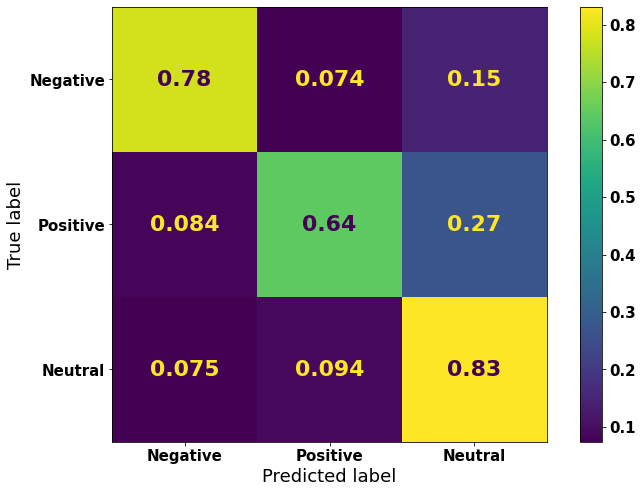

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8));

font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

cm_norm = confusion_matrix(Y_test, Y_pred_bert, normalize="true")
cm_display_norm = ConfusionMatrixDisplay(cm_norm, display_labels=['Negative', 'Positive', 'Neutral'])

cm_display_norm.plot(ax=ax);

plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)  

axes = plt.gca()

axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
plt.grid(False)

In [ ]:
# train and validation acc and loss grpahs



import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()
    

Train_Val_Plot(model.model['accuracy'],model.model['val_accuracy'],
               model.model['loss'],model.model['val_loss'])

AttributeError: ignored

# xxxxxxxxxxxxxxxxxxxxxxxxx ------End of BERT Model Here -------------------xxx

In [ ]:
#tweets['category_id'].value_counts()

1    1617
2     698
0     647
Name: category_id, dtype: int64

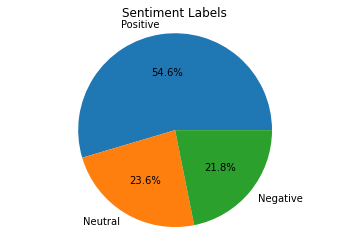

In [ ]:
import matplotlib.pyplot as plt

Tasks = [1617,698,647]

my_labels = 'Positive','Neutral','Negative'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Sentiment Labels')
plt.axis('equal')
plt.show()

In [ ]:
tweets

,Tweet,label,vader_compound_score,vader_values,category_id
0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0
1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,p,1
2,really disappointing to see m of analytics cap...,n,-0.2006,n,0
3,mattbc why im desperately hoping we get a publ...,n,0.0639,p,1
4,the number of people to consider be infected f...,n,-0.5859,n,0
...,...,...,...,...,...
2957,the drones are a potential risk to an organiza...,n,0.3612,p,1
2958,nor is microsoft team azure or any of the othe...,u,-0.0258,n,0
2959,the latest update for tigera includes deployin...,u,0.0000,u,2
2960,cheap or free cybersecurity training resources...,u,0.5106,p,1


# Word Cloud Here

In [ ]:
positive = tweets[tweets.vader_values == 'p']
negative = tweets[tweets.vader_values == 'n']

In [ ]:
positive

,Tweet,label,vader_compound_score,vader_values,category_id,tokenized_tweet,stopwords_removed,tweet_clean
1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,p,1,"[drdanrwilson, kstateturk, fiski70, runhack, p...","[drdanrwilson, kstateturk, fiski70, runhack, p...",drdanrwilson kstateturk fiski70 runhack provax...
3,mattbc why im desperately hoping we get a publ...,n,0.0639,p,1,"[mattbc, why, im, desperately, hoping, we, get...","[mattbc, im, desperately, hoping, get, public,...",mattbc im desperately hoping get public option...
5,jamie_shaw myfitnesspal myfitnesspal hydratemf...,u,0.3182,p,1,"[jamie_shaw, myfitnesspal, myfitnesspal, hydra...","[jamie_shaw, myfitnesspal, myfitnesspal, hydra...",jamie_shaw myfitnesspal myfitnesspal hydratemf...
8,th game finished of donkey kong land dkl is ba...,u,0.9298,p,1,"[th, game, finished, of, donkey, kong, land, d...","[th, game, finished, donkey, kong, land, dkl, ...",th game finished donkey kong land dkl basicall...
9,fighterofevil fitbitsupport myfitnesspal myfit...,u,0.3182,p,1,"[fighterofevil, fitbitsupport, myfitnesspal, m...","[fighterofevil, fitbitsupport, myfitnesspal, m...",fighterofevil fitbitsupport myfitnesspal myfit...
...,...,...,...,...,...,...,...,...
2953,cyber security analyst soc,u,0.3400,p,1,"[cyber, security, analyst, soc]","[cyber, security, analyst, soc]",cyber security analyst soc
2954,austtechcomp is hosting their program online u...,u,0.1779,p,1,"[austtechcomp, is, hosting, their, program, on...","[austtechcomp, hosting, program, online, covid...",austtechcomp hosting program online covid19 pa...
2955,cyberwarfare can destabilize a nation disrupt ...,u,0.4215,p,1,"[cyberwarfare, can, destabilize, a, nation, di...","[cyberwarfare, destabilize, nation, disrupt, c...",cyberwarfare destabilize nation disrupt commer...
2957,the drones are a potential risk to an organiza...,n,0.3612,p,1,"[the, drones, are, a, potential, risk, to, an,...","[drone, potential, risk, organization, informa...",drone potential risk organization information ...


In [ ]:
negative

,Tweet,label,vader_compound_score,vader_values,category_id,tokenized_tweet,stopwords_removed,tweet_clean
0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0,"[appymaga, mellecon, theangelofwrath, rantyamy...","[appymaga, mellecon, theangelofwrath, rantyamy...",appymaga mellecon theangelofwrath rantyamycurt...
2,really disappointing to see m of analytics cap...,n,-0.2006,n,0,"[really, disappointing, to, see, m, of, analyt...","[really, disappointing, see, analytics, capaci...",really disappointing see analytics capacity sp...
4,the number of people to consider be infected f...,n,-0.5859,n,0,"[the, number, of, people, to, consider, be, in...","[number, people, consider, infected, every, co...",number people consider infected every confirme...
6,chadmillsai i for one believe algorithms have ...,n,-0.3384,n,0,"[chadmillsai, i, for, one, believe, algorithms...","[chadmillsai, one, believe, algorithm, totally...",chadmillsai one believe algorithm totally scre...
7,hillarygache not over health health comes firs...,n,-0.4019,n,0,"[hillarygache, not, over, health, health, come...","[hillarygache, not, health, health, come, firs...",hillarygache not health health come first heal...
...,...,...,...,...,...,...,...,...
2944,ai in fraud detection holds potential to locat...,p,-0.4228,n,0,"[ai, in, fraud, detection, holds, potential, t...","[ai, fraud, detection, hold, potential, locate...",ai fraud detection hold potential locate perpe...
2945,no final do ms passado uma equipe de investiga...,u,-0.5267,n,0,"[no, final, do, ms, passado, uma, equipe, de, ...","[no, final, m, passado, uma, equipe, de, inves...",no final m passado uma equipe de investigadore...
2956,ransomware groups continue to target healthcar...,p,-0.2500,n,0,"[ransomware, groups, continue, to, target, hea...","[ransomware, group, continue, target, healthca...",ransomware group continue target healthcare cr...
2958,nor is microsoft team azure or any of the othe...,u,-0.0258,n,0,"[nor, is, microsoft, team, azure, or, any, of,...","[nor, microsoft, team, azure, others, cybersec...",nor microsoft team azure others cybersecurity ...


In [ ]:
from itertools import chain
import collections
from collections import Counter

In [ ]:
p_list = positive['stopwords_removed'].tolist() 
n_list = negative['stopwords_removed'].tolist() 


p_list = list(chain(*p_list))
n_list = list(chain(*n_list))



p = collections.Counter(p_list)
n = collections.Counter(n_list)


In [ ]:
p.most_common(200)

[('health', 489),
 ('patient', 326),
 ('http', 309),
 ('amp', 257),
 ('care', 226),
 ('virtual', 157),
 ('more', 149),
 ('like', 134),
 ('not', 133),
 ('help', 131),
 ('data', 129),
 ('technology', 123),
 ('u', 121),
 ('monitoring', 111),
 ('out', 109),
 ('time', 104),
 ('healthcare', 103),
 ('need', 99),
 ('telehealth', 92),
 ('information', 91),
 ('app', 88),
 ('medical', 88),
 ('support', 87),
 ('get', 85),
 ('service', 83),
 ('people', 81),
 ('mental', 80),
 ('new', 78),
 ('online', 77),
 ('one', 75),
 ('system', 75),
 ('im', 74),
 ('telemedicine', 74),
 ('community', 71),
 ('good', 70),
 ('work', 67),
 ('’', 67),
 ('day', 64),
 ('mobile', 63),
 ('free', 61),
 ('dont', 61),
 ('algorithm', 61),
 ('covid19', 60),
 ('intelligence', 59),
 ('way', 59),
 ('make', 59),
 ('some', 57),
 ('take', 57),
 ('remote', 57),
 ('know', 56),
 ('diagnostic', 56),
 ('via', 55),
 ('use', 55),
 ('Health', 54),
 ('portal', 53),
 ('surveillance', 52),
 ('best', 52),
 ('well', 52),
 ('would', 51),
 ('home',

In [ ]:
positive_stopwords = ['health','patient', 'http', 'amp', 'virtual', 'more', 'telehealth', 'patient', 'im', "’'", 'ai', 'know', 
                     'see', 'one', 'home', 'via', 'could', 'take', 'IoMT', 'go', 'make', 'Things', 'stay', 'art', 'stay',
                     "'s", 'also', 'day', 'thing', '``', "''", 'talk', 'u', 'no', 'may', 'youre', 'team', 'much', 'gt',
                      '...', 'use', 'way', 'no', 'year', 'may', 'IoMT', 'go', 'got', 'pm' , 'co']

In [ ]:
n.most_common(200)

[('health', 163),
 ('not', 122),
 ('patient', 122),
 ('no', 77),
 ('amp', 75),
 ('people', 59),
 ('need', 54),
 ('one', 49),
 ('http', 48),
 ('dont', 47),
 ('more', 44),
 ('time', 44),
 ('monitoring', 43),
 ('get', 42),
 ('surveillance', 41),
 ('mental', 41),
 ('prevention', 41),
 ('see', 38),
 ('case', 38),
 ('know', 38),
 ('out', 36),
 ('like', 36),
 ('year', 36),
 ('algorithm', 35),
 ('hit', 34),
 ('medical', 34),
 ('coronavirus', 34),
 ('u', 34),
 ('epidemiological', 33),
 ('public', 33),
 ('data', 33),
 ('covid19', 33),
 ('im', 33),
 ('technology', 33),
 ('’', 32),
 ('go', 31),
 ('many', 31),
 ('would', 30),
 ('work', 30),
 ('hospital', 30),
 ('make', 30),
 ('diagnostic', 30),
 ('every', 29),
 ('day', 28),
 ('even', 28),
 ('test', 28),
 ('via', 28),
 ('care', 27),
 ('come', 27),
 ('risk', 27),
 ('mobile', 26),
 ('some', 26),
 ('going', 25),
 ('real', 25),
 ('detection', 25),
 ('cancer', 24),
 ('new', 24),
 ('want', 24),
 ('much', 24),
 ('social', 24),
 ('problem', 23),
 ('flow', 2

In [ ]:
negative_stopwords = ['health', 'http','https', 'amp', 'virtual', 'more', 'telehealth', 'patient', 'patient', 'im', "’'", 'ai',
                      'know', 'see', 'one', 'home', 'via', 'could', 'take', 'IoMT', 'go', 'make', 'Things', 'stay', 'art', 'stay',
                      "'s", 'also', 'day', 'thing', '``', "''", 'talk', 'u', 'no', 'may', 'youre', 'team', 'much', 'gt',
                      '...',"’", "us", "would", "telemedicine", 'one', 'go', 'via', 'new', 'want', 'see', 'get', 'ill', 
                      'say', 'flu', 'tell', 'lot', 'de', 'may', 'fact', 'others', 'la', 'said', 'cost', 'youre', "''", 'thats', 'co']

In [ ]:
positive['stopwords_removed'] = positive['stopwords_removed'].apply(lambda y: [item for item in y if item.lower() not in positive_stopwords])
negative['stopwords_removed'] = negative['stopwords_removed'].apply(lambda y: [item for item in y if item.lower() not in negative_stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
positive['tweet_clean'] = [' '.join(map(str, l)) for l in positive['stopwords_removed']]
negative['tweet_clean'] = [' '.join(map(str, l)) for l in negative['stopwords_removed']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#positive_str = positive.tweet_clean.to_list()
positive_text1 = " ".join(review for review in positive.tweet_clean.astype(str))
negative_text1 = " ".join(review for review in negative.tweet_clean.astype(str))

In [ ]:
positive_text1 

"drdanrwilson kstateturk fiski70 runhack provaxtexan mstrixter troydee veritasever plasticdoe smcwoof jamesdieckhoff katlarue7 lithiumca jkellyca rocza handmadekathy laughlandmorgan andrewlazarus4 kevinault grumfromnorwich crabb_vicki shonadmcdermott retire_young_38 takethatdoctors jdsro159 flitesurgn michaelmina_lab mcfunny awithonelison doritmi margie_moo nocoochi mc40_e christydubbs krochetxkorner carlsmythe terryexsci roguetrader84 mmelgar09 parentmindinc marikatt77 qtent2016 heartistsince11 julieamclean green_cait skeptmgmt californiaatto2 tinfoilawards liamkav whoweareuk oh honey collect evidence done want disprove evidence need gather however mine came head epidemiological surveillance department public center ministry ukraine mattbc desperately hoping get public option passed session ct not bear terrible coverage option interferes ability hire unfortunately small ee plan not attractive customer jamie_shaw myfitnesspal myfitnesspal hydratemfp mfpdoesntsyncwater get added please 

In [ ]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show>

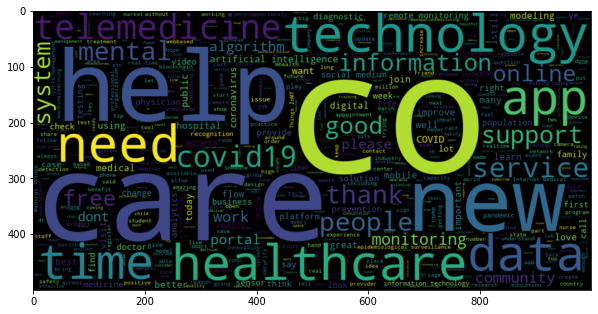

In [ ]:
plt.figure(figsize=(10,10))
#positive_text=positive_text1
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text1)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

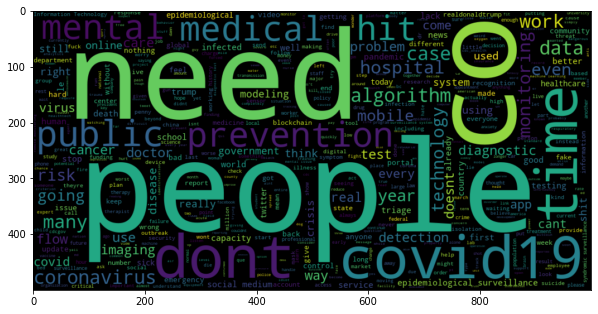

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(negative_text1)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [ ]:
positive_text1 = positive_text1.split()

In [ ]:
negative_text1 = negative_text1.split()

In [ ]:
negative_text1

['appymaga',
 'mellecon',
 'theangelofwrath',
 'rantyamycurtis',
 'rm1evo',
 'misterantibully',
 'death',
 'rate',
 'not',
 'valid',
 'people',
 'intensive',
 'care',
 'require',
 'intensive',
 'care',
 'million',
 'people',
 'max',
 'capacity',
 'hospitalization',
 'million',
 'bed',
 'range',
 'le',
 'million',
 'season',
 'typically',
 'really',
 'disappointing',
 'analytics',
 'capacity',
 'spent',
 'outside',
 'nh',
 'most',
 'nh',
 'analyst',
 'capability',
 'desire',
 'population',
 'work',
 'datasaveslives',
 'apha_analysts',
 'healthfdn',
 'nuffieldtrust',
 'number',
 'people',
 'consider',
 'infected',
 'every',
 'confirmed',
 'case',
 'apparently',
 'suspected',
 'case',
 'reported',
 'immediately',
 'epidemiological',
 'surveillance',
 'control',
 'infectiousdisease',
 'ncoronavirus',
 'chadmillsai',
 'believe',
 'algorithm',
 'totally',
 'screwed',
 'stock',
 'market',
 'dont',
 'dont',
 'inner',
 'working',
 'well',
 'hillarygache',
 'not',
 'come',
 'first',
 'problem',


In [ ]:


#p_list = list(chain(*positive_text1))
#n_list = list(chain(*n_list))



p = collections.Counter(positive_text1)
n = collections.Counter(negative_text1)

In [ ]:
n.most_common(200)

[('not', 122),
 ('people', 59),
 ('need', 54),
 ('dont', 47),
 ('time', 44),
 ('monitoring', 43),
 ('surveillance', 41),
 ('mental', 41),
 ('prevention', 41),
 ('case', 38),
 ('out', 36),
 ('like', 36),
 ('year', 36),
 ('algorithm', 35),
 ('hit', 34),
 ('medical', 34),
 ('coronavirus', 34),
 ('epidemiological', 33),
 ('public', 33),
 ('data', 33),
 ('covid19', 33),
 ('technology', 33),
 ('many', 31),
 ('work', 30),
 ('hospital', 30),
 ('diagnostic', 30),
 ('every', 29),
 ('even', 28),
 ('test', 28),
 ('care', 27),
 ('come', 27),
 ('risk', 27),
 ('mobile', 26),
 ('some', 26),
 ('going', 25),
 ('real', 25),
 ('detection', 25),
 ('cancer', 24),
 ('social', 24),
 ('problem', 23),
 ('flow', 23),
 ('way', 23),
 ('use', 23),
 ('doctor', 23),
 ('doesnt', 23),
 ('imaging', 23),
 ('system', 21),
 ('virus', 21),
 ('death', 20),
 ('app', 20),
 ('cant', 20),
 ('information', 20),
 ('modeling', 20),
 ('disease', 19),
 ('think', 19),
 ('issue', 18),
 ('using', 18),
 ('right', 18),
 ('crisis', 18),
 (

<function matplotlib.pyplot.show>

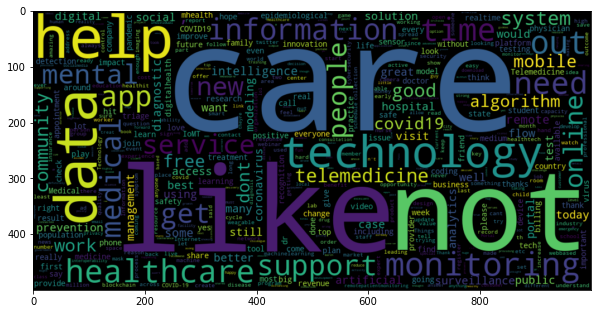

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate_from_frequencies(p)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

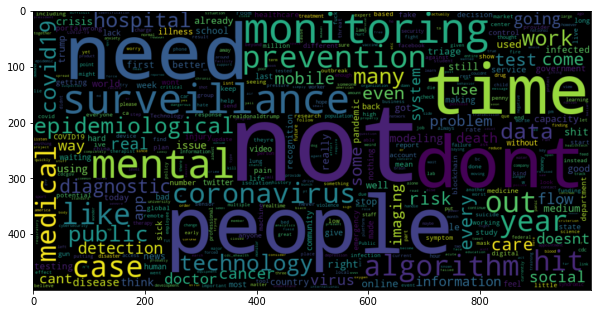

In [ ]:
plt.figure(figsize=(10,10))
#negative_text=negative_text
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate_from_frequencies(n)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

# Text Preprocessing

In [ ]:
final_sentiment['tokenized_tweet'] = final_sentiment.apply(lambda row: nltk.word_tokenize(str(row['Tweet'])), axis=1)

In [ ]:
final_sentiment

,Unnamed: 0,Tweet,label,vader_compound_score,final_label,category_id,Tweet_cleaned,tokenized_tweet
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0,appymaga mellecon theangelofwrath rantyamycurt...,"[appymaga, mellecon, theangelofwrath, rantyamy..."
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u,1,drdanrwilson kstateturk fiski runhack provaxte...,"[drdanrwilson, kstateturk, fiski70, runhack, p..."
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n,0,really disappointing see analytics capacity sp...,"[really, disappointing, to, see, m, of, analyt..."
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n,0,mattbc im desperately hoping get public option...,"[mattbc, why, im, desperately, hoping, we, get..."
4,4,the number of people to consider be infected f...,n,-0.5859,n,0,number people consider infected every confirme...,"[the, number, of, people, to, consider, be, in..."
...,...,...,...,...,...,...,...,...
2951,3086,the drones are a potential risk to an organiza...,n,0.3612,n,0,drones potential risk organizations informatio...,"[the, drones, are, a, potential, risk, to, an,..."
2952,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u,1,microsoft team azure others cybersecurity peop...,"[nor, is, microsoft, team, azure, or, any, of,..."
2953,3088,the latest update for tigera includes deployin...,u,0.0000,u,1,latest update tigera includes deploying kubern...,"[the, latest, update, for, tigera, includes, d..."
2954,3089,cheap or free cybersecurity training resources...,u,0.5106,u,1,cheap free cybersecurity training resources vi...,"[cheap, or, free, cybersecurity, training, res..."


In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
remove_words = {'against', 'out', 'more', 'most', 'some', 'no', 'not', 'nor', "don't", "aren't", "didn't", "doesn't", "hadn't", "hasn't",
           "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"}

In [ ]:
stop -= remove_words

In [ ]:
final_sentiment['stopwords_removed'] = final_sentiment['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])

In [ ]:
import string 
punc = string.punctuation + '--' # Add characters as necessary 
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [word for word in x if word not in digits])


In [ ]:
final_sentiment

,Unnamed: 0,Tweet,label,vader_compound_score,final_label,category_id,Tweet_cleaned,tokenized_tweet,stopwords_removed
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0,appymaga mellecon theangelofwrath rantyamycurt...,"[appymaga, mellecon, theangelofwrath, rantyamy...","[appymaga, mellecon, theangelofwrath, rantyamy..."
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u,1,drdanrwilson kstateturk fiski runhack provaxte...,"[drdanrwilson, kstateturk, fiski70, runhack, p...","[drdanrwilson, kstateturk, fiski70, runhack, p..."
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n,0,really disappointing see analytics capacity sp...,"[really, disappointing, to, see, m, of, analyt...","[really, disappointing, see, analytics, capaci..."
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n,0,mattbc im desperately hoping get public option...,"[mattbc, why, im, desperately, hoping, we, get...","[mattbc, im, desperately, hoping, get, public,..."
4,4,the number of people to consider be infected f...,n,-0.5859,n,0,number people consider infected every confirme...,"[the, number, of, people, to, consider, be, in...","[number, people, consider, infected, every, co..."
...,...,...,...,...,...,...,...,...,...
2951,3086,the drones are a potential risk to an organiza...,n,0.3612,n,0,drones potential risk organizations informatio...,"[the, drones, are, a, potential, risk, to, an,...","[drones, potential, risk, organizations, infor..."
2952,3087,nor is microsoft team azure or any of the othe...,u,-0.0258,u,1,microsoft team azure others cybersecurity peop...,"[nor, is, microsoft, team, azure, or, any, of,...","[nor, microsoft, team, azure, others, cybersec..."
2953,3088,the latest update for tigera includes deployin...,u,0.0000,u,1,latest update tigera includes deploying kubern...,"[the, latest, update, for, tigera, includes, d...","[latest, update, tigera, includes, deploying, ..."
2954,3089,cheap or free cybersecurity training resources...,u,0.5106,u,1,cheap free cybersecurity training resources vi...,"[cheap, or, free, cybersecurity, training, res...","[cheap, free, cybersecurity, training, resourc..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
final_sentiment['stopwords_removed'] = final_sentiment['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
final_sentiment['tweet_clean'] = [' '.join(map(str, l)) for l in final_sentiment['stopwords_removed']]

In [ ]:
final_sentiment.category_id.dtypes

dtype('int64')

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(final_sentiment.tweet_clean).toarray()

labels = final_sentiment.category_id

print("Each of the %d tweets is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2956 tweets is represented by 2009 features (TF-IDF score of unigrams and bigrams)


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
category_id_df = final_sentiment[['label', 'category_id']].drop_duplicates()

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [ ]:
N = 3
for label, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(label))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> n:
  * Most Correlated Unigrams are: sensor, interoperability, live
  * Most Correlated Bigrams are: apple health, artificial intelligence, 19 http

==> p:
  * Most Correlated Unigrams are: sensor, interoperability, live
  * Most Correlated Bigrams are: apple health, artificial intelligence, 19 http

==> u:
  * Most Correlated Unigrams are: flu, risk, shit
  * Most Correlated Bigrams are: health issue, artificial intelligence, public health


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Cleaning [experiment with these choices downstream]
re_tokenizer = RegexpTokenizer("[\\w']+") # Sally's tokenizer
final_sentiment['Tweet_tok'] = final_sentiment['Tweet'].apply(re_tokenizer.tokenize)

punc = string.punctuation
digits = string.digits 
stopwords_nltk = nltk.corpus.stopwords.words('english')


final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok'].apply(lambda x: [word.lower() for word in x])
final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in punc])
final_sentiment['Tweet_tok_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])
final_sentiment['Tweet_cleaned'] = final_sentiment['Tweet_tok_cleaned'].apply(lambda x: " ".join(x))

final_sentiment['Tweet_cleaned'] = final_sentiment['Tweet_cleaned'].apply(lambda x: re.sub(r'\d+', '',x))
#final_sentiment['num_words'] = final_sentiment['Tweet_cleaned'].apply(lambda x: len(x.split()))

final_sentiment = final_sentiment.drop(columns=['Tweet_tok','Tweet_tok_cleaned'])
final_sentiment.head()

,Unnamed: 0,Tweet,label,vader_compound_score,final_label,category_id,Tweet_cleaned
0,0,appymaga mellecon theangelofwrath rantyamycurt...,n,-0.5994,n,0,appymaga mellecon theangelofwrath rantyamycurt...
1,1,drdanrwilson kstateturk fiski70 runhack provax...,u,0.0772,u,1,drdanrwilson kstateturk fiski runhack provaxte...
2,2,really disappointing to see m of analytics cap...,n,-0.2006,n,0,really disappointing see analytics capacity sp...
3,3,mattbc why im desperately hoping we get a publ...,n,0.0639,n,0,mattbc im desperately hoping get public option...
4,4,the number of people to consider be infected f...,n,-0.5859,n,0,number people consider infected every confirme...


In [ ]:
final_sentiment['Tweet_cleaned'] = final_sentiment['Tweet_cleaned'].astype('str')

In [ ]:
final_sentiment.category_id.value_counts()

2    1330
1     955
0     671
Name: category_id, dtype: int64

In [ ]:
X = final_sentiment['Tweet_cleaned'] # Collection of documents
y = final_sentiment['category_id']

In [ ]:
X = final_sentiment['Tweet_cleaned'] # Collection of documents
y = final_sentiment['category_id'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0,
                                                    stratify = final_sentiment['category_id']) # Stratify ensures equal distribution of 0/1 in training and test sets)

In [ ]:
X_train

1434    next vs feature engineering process mining ena...
762     watched accident episode lemme tell still fuck...
221     featured libguide week womens health resources...
2695    drone abulence could transport one person time...
1635    dr taylor seeing patients virtually approved d...
                              ...                        
1551    health information technology national bluepri...
1496    delta health alliance health information techn...
2104    aupet purple butterfly design digital camera c...
2310    imaging getting paid play video games complain...
1212    took virtual field trip video chat meet exciti...
Name: Tweet_cleaned, Length: 2364, dtype: object

In [ ]:
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(2364, 12911)

In [ ]:
y_train.shape

(2364,)

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
#import warnings

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model_rf.fit(X_train_tfidf, y_train)
Y_pred_rf = model_rf.predict(X_test_tfidf)

In [ ]:
print(classification_report(Y_test, Y_pred_rf)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       135
           1       0.00      0.00      0.00       191
           2       0.45      1.00      0.62       266

    accuracy                           0.45       592
   macro avg       0.15      0.33      0.21       592
weighted avg       0.20      0.45      0.28       592



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']
rf_perf = pd.DataFrame([precision_score(Y_test, Y_pred_rf,average='macro'), 
                                    recall_score(Y_test, Y_pred_rf,average='macro'),
                                    accuracy_score(Y_test, Y_pred_rf),
                                    f1_score(Y_test, Y_pred_rf,average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred_rf)], index=index)

performance_metrics['Random Forest'] = pd.Series(rf_perf[0])
performance_metrics

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,BERT,Random Forest
Precision,0.759143,0.149464
Recall,0.750861,0.332080
Accuracy,0.758446,0.447635
F1 score,0.752146,0.206145
MCC,0.623540,-0.031702




```
# This is formatted as code
```

# Logistic Regression

In [ ]:
train, test = train_test_split(tweets, test_size=0.1, random_state=42, stratify = tweets['category_id'])

In [ ]:
print(len(train))
print(len(test))

2665
297


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(#min_df = 5,
                             #max_df = 0.7,
                             sublinear_tf = True,
                             #ngram_range=(1,3),
                             use_idf = True)
train_matrix = vectorizer.fit_transform(train['tweet_clean'])
test_matrix = vectorizer.transform(test['tweet_clean'])

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)

In [ ]:
model_lr.fit(X_train_tfidf, Y_train)


Y_pred_logit = model_lr.predict(X_test_tfidf)

In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']
logit_perf = pd.DataFrame([precision_score(Y_test, Y_pred_logit,average='macro'), 
                                    recall_score(Y_test, Y_pred_logit,average='macro'),
                                    accuracy_score(Y_test, Y_pred_logit),
                                    f1_score(Y_test, Y_pred_logit,average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred_logit)], index=index)

performance_metrics['Logistic regression'] = pd.Series(logit_perf[0])
performance_metrics

,BERT,Random Forest,Logistic regression,SVM
Precision,0.759143,0.679758,0.667730,0.680058
Recall,0.750861,0.618726,0.605450,0.650786
Accuracy,0.758446,0.663851,0.653716,0.677365
F1 score,0.752146,0.626976,0.618293,0.660845
MCC,0.623540,0.466787,0.450835,0.489917


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(y_test, predictions) #y_true, y_pred

array([[ 19,  44,   2],
       [  3, 154,   5],
       [  1,  41,  28]])

In [ ]:
print(classification_report(y_test, predictions)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.83      0.29      0.43        65
           1       0.64      0.95      0.77       162
           2       0.80      0.40      0.53        70

    accuracy                           0.68       297
   macro avg       0.76      0.55      0.58       297
weighted avg       0.72      0.68      0.64       297



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

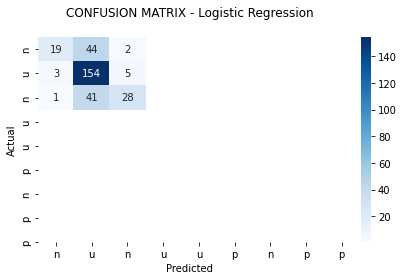

In [ ]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.label.values, 
            yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n")
plt.tight_layout()
plt.show();

# Random Forest

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
model_rf.fit(X_train_tfidf, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred_rf = model_rf.predict(X_test_tfidf)

In [ ]:
Y_pred_rf

array([2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0,
       0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1,

In [ ]:
np.array(np.unique(y_pred, return_counts=True)).T
# Negative = 0
# Positive = 1
# Neutral = 2

array([[  0,  23],
       [  1, 201],
       [  2,  73]])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(y_test, predictions) #y_true, y_pred

array([[ 19,  44,   2],
       [  3, 154,   5],
       [  1,  41,  28]])

In [ ]:
print(classification_report(Y_test, Y_pred_rf)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.74      0.37      0.49       135
           1       0.64      0.70      0.67       191
           2       0.66      0.79      0.72       266

    accuracy                           0.66       592
   macro avg       0.68      0.62      0.63       592
weighted avg       0.67      0.66      0.65       592



In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']
logit_perf = pd.DataFrame([precision_score(Y_test, Y_pred_rf, average='macro'), 
                                    recall_score(Y_test, Y_pred_rf, average='macro'),
                                    accuracy_score(Y_test, Y_pred_rf),
                                    f1_score(Y_test, Y_pred_rf, average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred_rf)], index=index)

performance_metrics['Random Forest'] = pd.Series(logit_perf[0])
performance_metrics

,BERT,Random Forest,Logistic regression,SVM
Precision,0.759143,0.679758,0.392392,0.304836
Recall,0.750861,0.618726,0.381098,0.308090
Accuracy,0.758446,0.663851,0.437500,0.395270
F1 score,0.752146,0.626976,0.373726,0.304593
MCC,0.623540,0.466787,0.082581,-0.035557


# SVM

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(final_sentiment['tweet_clean'], 
                                                    final_sentiment['category_id'],
                                                    test_size = 0.2,
                                                    stratify = final_sentiment['category_id']) # Stratify ensures equal distribution of 0/1 in training and test sets  

In [ ]:
X_train

2885                                _tad_ sample modeling
712     terrell lewis going continue pay every eyeball...
599     love major bank etc sending special report mor...
34      hour left register early bird discount amr2020...
2114    whimsy stamp digital diva june wrap part digit...
                              ...                        
188     projectlincoln reedgalen jwgop therickwilson t...
1314    highly recommend everyone “ dial ” amp share A...
291     myntra myntrasupport updating myntra latest ap...
363     california gov gavin newsom said thursday stat...
214        martifenosa vuejs yes website mobile phone far
Name: tweet_clean, Length: 2364, dtype: object

In [ ]:
Y_train

2885    1
712     2
599     2
34      1
2114    1
       ..
188     2
1314    2
291     0
363     1
214     1
Name: category_id, Length: 2364, dtype: int64

In [ ]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

<2364x12401 sparse matrix of type '<class 'numpy.float64'>'
	with 41482 stored elements in Compressed Sparse Row format>

In [ ]:
# Train the SVM model
svm_model = LinearSVC(random_state = 72)
svm_model.fit(X_train_tfidf, Y_train)

LinearSVC(random_state=72)

In [ ]:
# Generate predictions on the test set
Y_pred = svm_model.predict(X_test_tfidf)

In [ ]:
Y_pred

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2,

In [ ]:
np.array(np.unique(Y_pred, return_counts=True)).T
# Negative = 0
# Positive = 1
# Neutral = 2

array([[  0, 110],
       [  1, 170],
       [  2, 312]])

In [ ]:
# Negative = 0
# Positive = 1
# Neutral = 2

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#new = np.asarray(df1['Manual_Sentiment']) #y_test
confusion_matrix(Y_test, Y_pred) #y_true, y_pred

array([[ 73,  33,  29],
       [ 23, 106,  62],
       [ 18,  37, 211]], dtype=int64)

In [ ]:
import seaborn as sns

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.label.values, 
            yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n")
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'MCC']
logit_perf = pd.DataFrame([precision_score(Y_test, Y_pred, average='macro'), 
                                    recall_score(Y_test, Y_pred, average='macro'),
                                    accuracy_score(Y_test, Y_pred),
                                    f1_score(Y_test, Y_pred, average='macro'),
                                    matthews_corrcoef(Y_test, Y_pred)], index=index)

performance_metrics['SVM'] = pd.Series(logit_perf[0])
performance_metrics

,BERT,Random Forest,Logistic regression,SVM
Precision,0.759143,0.679758,0.392392,0.680058
Recall,0.750861,0.618726,0.381098,0.650786
Accuracy,0.758446,0.663851,0.437500,0.677365
F1 score,0.752146,0.626976,0.373726,0.660845
MCC,0.623540,0.466787,0.082581,0.489917


In [ ]:
#Generate performance metrics
print('Precision: ', precision_score(Y_test, Y_pred, average='macro'))
print('Recall: ', recall_score(Y_test, Y_pred, average='macro'))
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('F1 score: ', f1_score(Y_test, Y_pred, average='macro'))
#print('ROC-AUC score: ', roc_auc_score(Y_test, Y_pred)) # Note the difference.#
print('MCC: ', matthews_corrcoef(Y_test, Y_pred)) # Note the difference. Other measures artificially inflated by class imbalance.

Precision:  0.30483568718862836
Recall:  0.30809008170999536
Accuracy:  0.34966216216216217
F1 score:  0.30459297292324133
MCC:  -0.03555700873555291


In [ ]:
print(classification_report(Y_test, Y_pred)) # y_true, y_pred

              precision    recall  f1-score   support

           0       0.64      0.54      0.59       135
           1       0.60      0.55      0.58       191
           2       0.70      0.79      0.74       266

    accuracy                           0.66       592
   macro avg       0.65      0.63      0.64       592
weighted avg       0.65      0.66      0.65       592



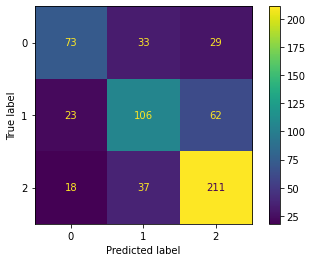

In [ ]:
cm = confusion_matrix(Y_test, Y_pred, labels=svm_model.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_).plot()